# Tutorial to run HOD models
Should work under cosmodesi 2025_03 environment 

In [1]:
import sys
sys.path.insert(0, '/global/homes/s/shengyu/.local/perlmutter/python-3.11/lib/python3.11/site-packages')
from HODDIES import HOD

# Using abacus simulation at NERSC

In [7]:
# Initiate the HOD instance with default parameter file default_HOD_parameters.yaml

HOD_obj= HOD(path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')

Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...
Done took 00:00:12
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:13
Initialize Abacus c000 cosmology


## - Different ways to give input parameters

If you want to use a custom parameter file:


```js
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
``` 
<br> 

You can pass a dictionnary :

```js
args = {'''pass any parameters with the same structure as the default yaml parameter file'''}
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
```

You can also overwrite parameters if you provide **kwargs dict

```js
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
or
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
```

<br> 

## - Different ways to load halo catalogs 

Catalog types supported: `np.ndarray, mpytools.Catalog, dict`

Halo catalogs must contain at least these colunms: `['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id']`

Initialize the instance with a preloaded halo_catalog:

```js
HOD_obj= HOD(hcat_file=halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```

You can also pass the path of the halo catalog. Supported format are: `fits, h5, asdf`

```js
path_to_halo_catalog = '/path/to/halo_catalog'
HOD_obj= HOD(hcat_file=path_to_halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```


In [8]:
# All parameters from the parameter file are set here
HOD_obj.args

{'tracers': ['LRG', 'ELG'],
 'LRG': {'HOD_model': 'SHOD',
  'Ac': 1,
  'log_Mcent': 12.75,
  'sigma_M': 0.5,
  'gamma': 1,
  'pmax': 1,
  'Q': 100,
  'satellites': True,
  'sat_HOD_model': 'Nsat_pow_law',
  'As': 1,
  'M_0': 12.5,
  'M_1': 13.5,
  'alpha': 1,
  'f_sigv': 1,
  'vel_sat': 'rd_normal',
  'v_infall': 0,
  'assembly_bias': {'c': [0, 0], 'env': [0, 0]},
  'conformity_bias': False,
  'exp_frac': 0,
  'exp_scale': 1,
  'nfw_rescale': 1,
  'density': 0.0007,
  'vsmear': 0},
 'ELG': {'Ac': 0.05,
  'As': 0.11,
  'HOD_model': 'GHOD',
  'sat_HOD_model': 'Nsat_pow_law',
  'M_0': 11.63,
  'M_1': 11.7,
  'Q': 100,
  'alpha': 0.6,
  'assembly_bias': {'c': [0, 0]},
  'conformity_bias': False,
  'density': 0.001,
  'f_sigv': 1,
  'gamma': 1,
  'log_Mcent': 11.63,
  'pmax': 0.1,
  'satellites': True,
  'sigma_M': 0.12,
  'vel_sat': 'rd_normal',
  'exp_frac': 0,
  'exp_scale': 1,
  'nfw_rescale': 1,
  'v_infall': 0,
  'vsmear': 0},
 'hcat': {'boxsize': None,
  'path_to_sim': None,
  'path_

# Using a custom halo catalog

In [9]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')
print('Satelitte HOD model is the standard power law')

Tracers considered ['LRG', 'ELG']
HOD model for LRG: SHOD
HOD model for ELG: GHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [10]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'HOD_model': 'SHOD', 'Ac': 1, 'log_Mcent': 12.75, 'sigma_M': 0.5, 'gamma': 1, 'pmax': 1, 'Q': 100, 'satellites': True, 'sat_HOD_model': 'Nsat_pow_law', 'As': 1, 'M_0': 12.5, 'M_1': 13.5, 'alpha': 1, 'f_sigv': 1, 'vel_sat': 'rd_normal', 'v_infall': 0, 'assembly_bias': {'c': [0, 0], 'env': [0, 0]}, 'conformity_bias': False, 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'density': 0.0007, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}


In [11]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 9.305556297302246
Start satellite assignement


/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py:499: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../../../../../../../homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py", line 415:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../../../../../../../homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py", line 487:
def compute_fast_NFW(x

Satellite assignement done 4.247309923171997
LRG mock catalogue done 4.348762035369873
562071 central galaxies, 137443 satellites, fraction of satellite 0.20 
Done overall time  LRG 14.203782558441162
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 9.2355318069458
Start satellite assignement
Satellite assignement done 0.4365663528442383
ELG mock catalogue done 0.572617769241333
445440 central galaxies, 553252 satellites, fraction of satellite 0.55 
Done overall time  ELG 19.65027666091919


/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../../../../../../../homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.3929405212402344
Start satellite assignement
Satellite assignement done 0.41421031951904297
ELG mock catalogue done 0.5380175113677979
445578 central galaxies, 553178 satellites, fraction of satellite 0.55 
Done overall time  ELG 1.4296996593475342


(Catalog(csize=1698206, size=1698206, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 Catalog(csize=998756, size=998756, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']))

In [12]:
# By default the code automatically fix the density
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg.size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nodens.size)


Density fixed to  0.001 ELG catalogue size: 998756
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.3890507221221924
Start satellite assignement
Satellite assignement done 0.9834744930267334
ELG mock catalogue done 1.3219895362854004
1031746 central galaxies, 1283627 satellites, fraction of satellite 0.55 
Done overall time  ELG 2.431466817855835
ELG catalogue size without density constrain: 2315373


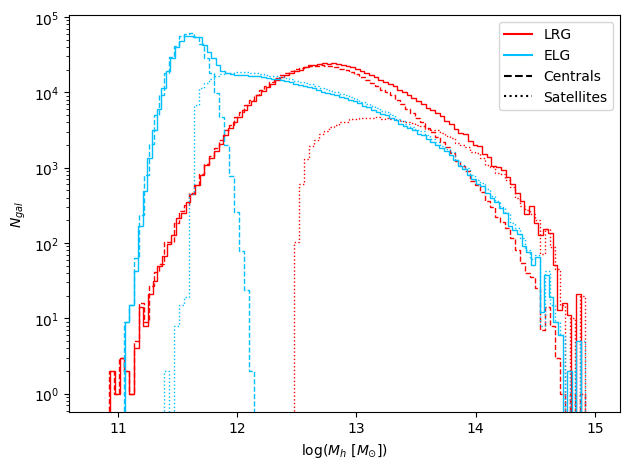

In [13]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


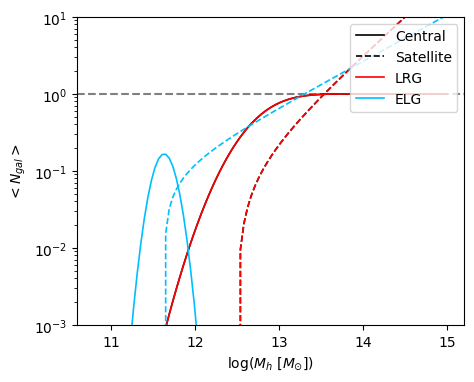

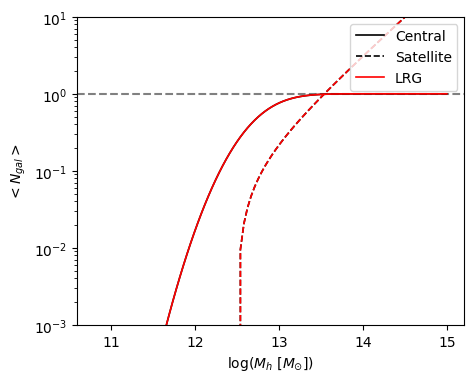

In [14]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [15]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [16]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Compute wp for ELG...
Cosmology not set, does not apply rsd


Done in 0.534 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 0.739 s


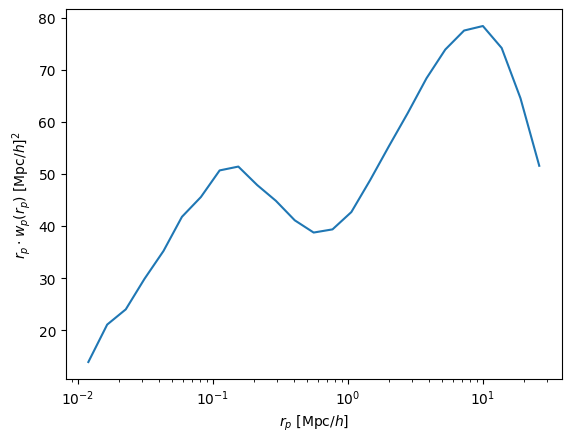

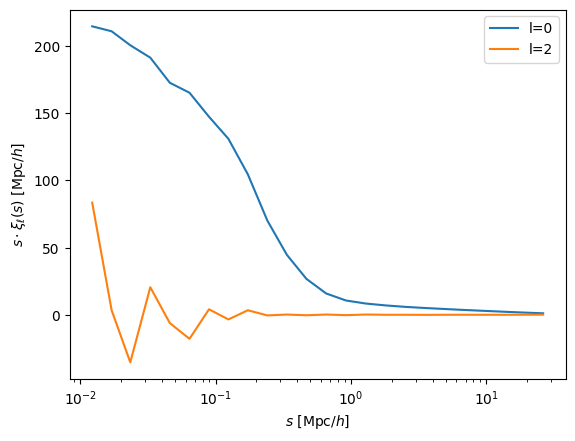

In [17]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [18]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG', verbose=False) for ii in np.random.randint(0,2**32, size=10)]

/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../../../../../../../homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


#Compute wp for ELG...
Cosmology not set, does not apply rsd


Done in 0.629 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.666 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.615 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.637 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.569 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.574 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.676 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.693 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.600 s
#Compute wp for ELG...
Cosmology not set, does not apply rsd
Done in 0.601 s


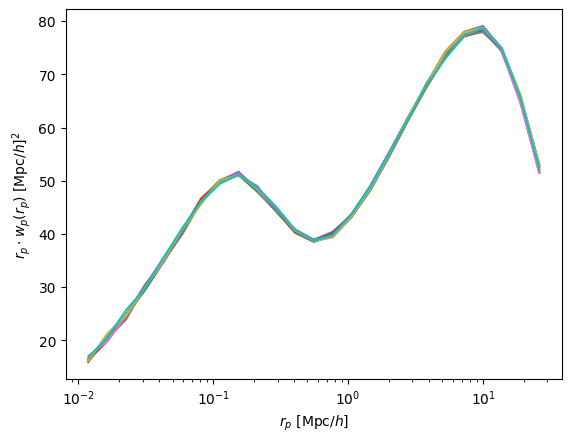

#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.161 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.061 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.062 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.109 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.114 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.096 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.120 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.202 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.110 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.121 s


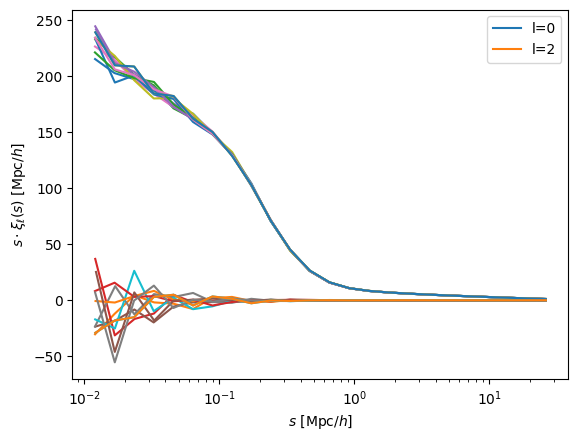

In [19]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

# Use particles for satelittes instead of NFW

In [20]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...


Done took 00:00:11
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:12
Initialize Abacus c000 cosmology


/global/homes/s/shengyu/.conda/envs/hod_env/lib/python3.11/site-packages/HODDIES/hod.py:190: UserWarning: Could not import cosmoprimo. Install cosmoprimo with "python -m pip install git+https://github.com/cosmodesi/cosmoprimo[class,camb,extras]".
Cosmology needed to apply RSD when computing correlations. No cosmology set.
  warnings.warn('Could not import cosmoprimo. Install cosmoprimo with "python -m pip install git+https://github.com/cosmodesi/cosmoprimo[class,camb,extras]".\n'\


In [21]:
HOD_obj_part.hcat

Catalog(csize=48548940, size=48548940, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])

In [22]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles
cats = HOD_obj_part.make_mock_cat('LRG',fix_seed=None) 
cats 

Create mock catalog for ['LRG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 0.4123873710632324
Start satellite assignement
Satellite assignement done 0.11768937110900879
LRG mock catalogue done 0.20715856552124023
562014 central galaxies, 137494 satellites, fraction of satellite 0.20 
Done overall time  LRG 1.0820562839508057


Catalog(csize=699508, size=699508, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [23]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None)
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 0.3289802074432373
Start satellite assignement
Satellite assignement done 0.11777138710021973
LRG mock catalogue done 0.19722223281860352
562283 central galaxies, 137612 satellites, fraction of satellite 0.20 
Done overall time  LRG 0.9935567378997803
Run HOD for ELG
No density set
HOD Computed 1.0195989608764648
Start satellite assignement
Satellite assignement done 0.9583022594451904
ELG mock catalogue done 1.2878265380859375
1032152 central galaxies, 1282044 satellites, fraction of satellite 0.55 
Done overall time  ELG 3.122926712036133


Catalog(csize=3014091, size=3014091, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

#Compute wp for ELG...
Cosmology not set, does not apply rsd


Done in 0.562 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
Cosmology not set, does not apply rsd
#Done in 1.347 s


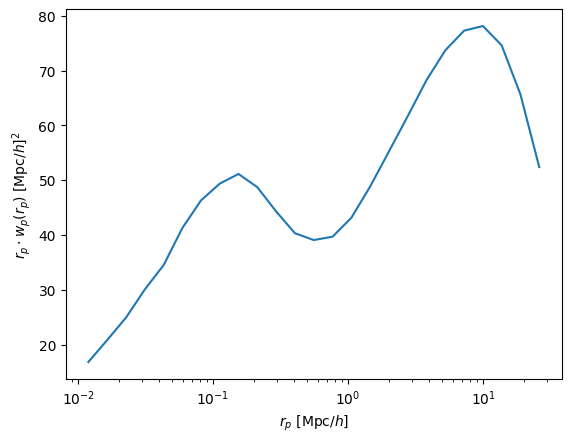

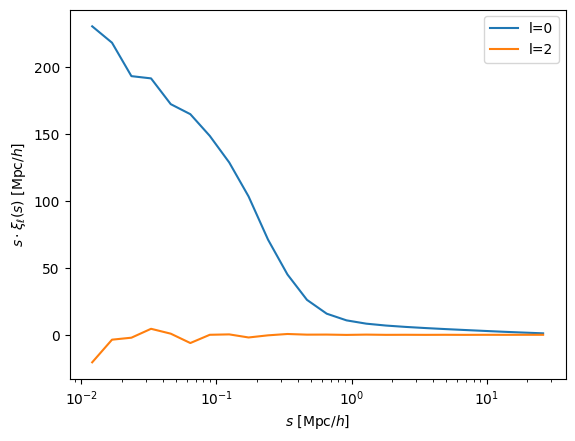

In [24]:
#compute clustering for 1 tracer, it applies rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [25]:
cross_corr = HOD_obj_part.get_crosswp(cats, tracers=['ELG', 'LRG'], verbose=True)

#Compute wp for ['ELG' 'ELG']...
Cosmology not set, does not apply rsd


#Done in 1.230 s
#Compute wp for ['ELG' 'LRG']...
Cosmology not set, does not apply rsd
#Done in 0.775 s
#Compute wp for ['LRG' 'LRG']...
Cosmology not set, does not apply rsd
#Done in 0.299 s


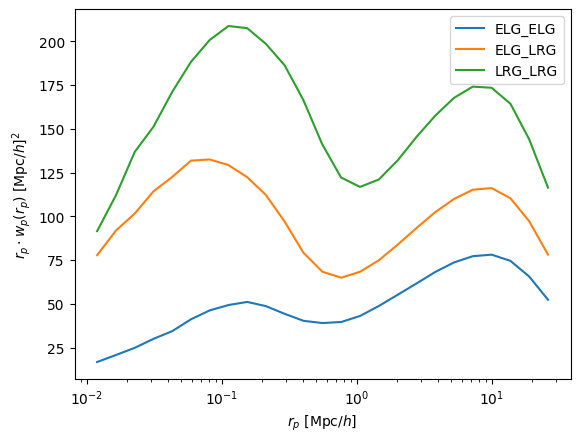

In [26]:
for tr, (rp, wp) in zip(cross_corr.keys(), cross_corr.values()):
    plt.plot(rp,rp*wp, label=tr)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()